# Credit Card Fraud Detection
***
## Table of Contents
1. [Introduction](#1-introduction)
1. [Loading Data](#2-loading-data)
1. [Data Preprocessing](#3-data-preprocessing)
    - [Dealing with Datetime](#dealing-with-datetime)
    - [Dealing with Geospatial Data](#dealing-with-geospatial-data)
    - [Dropping Unnecessary Features](#dropping-unnecessary-features)
    - [Standardisation](#standardisation)
1. [Exploratory Data Analysis](#4-exploratory-data-analysis)
1. [Predictive Modelling](#5-predictive-modelling)
    - [Using Pipeline for Preprocessing](#using-pipeline-for-preprocessing)
    - [Hyperparameter Tuning](#hyperparameter-tuning)
    - [Evaluation on Test Data](#evaluation-on-test-data)
1. [Conclusion](#6-conclusion)
1. [References](#7-references)
***

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from typing import Dict, Any

## 1. Introduction
Credit card fraud has been an evolving threat in modern society. The proliferation of digital transactions and the tactics of fraudsters have made the detection of fraudulent activities more challenging than ever.

Machine learning algorithms provide a powerful framework for identifying anomalous patterns within vast quantities of data. The objective of this project is to develop and compare multiple predictive models capable of detecting fraudulent credit card transactions with a high degree of accuracy based on a large dataset.

## 2. Loading Data
The dataset used in this project (retrieved from [Kaggle - Credit Card Transactions Fraud Detection Dataset](https://www.kaggle.com/datasets/kartik2112/fraud-detection)) contains credit card transactions between 01/01/2019 and 31/12/2020.

- **index**: Unique Identifier for each row
- **trans_date_trans_time**: Transaction DateTime
- **cc_num**: Credit Card Number of Customer
- **merchant**: Merchant Name
- **category**: Category of Merchant
- **amt**: Amount of Transaction
- **first**: First Name of Credit Card Holder
- **last**: Last Name of Credit Card Holder
- **gender**: Gender of Credit Card Holder
- **street**: Street Address of Credit Card Holder
- **city**: City of Credit Card Holder
- **state**: State of Credit Card Holder
- **zip**: Zip of Credit Card Holder
- **lat**: Latitude Location of Credit Card Holder
- **long**: Longitude Location of Credit Card Holder
- **city_pop**: Credit Card Holder's City Population
- **job**: Job of Credit Card Holder
- **dob**: Date of Birth of Credit Card Holder
- **trans_num**: Transaction Number
- **unix_time**: UNIX Time of transaction
- **merch_lat**: Latitude Location of Merchant
- **merch_long**: Longitude Location of Merchant
- **is_fraud**: Fraud Flag ($0$ = Not fraud, $1$ = Fraud). Target Variable

In [2]:
df_train = pd.read_csv("_datasets/fraudTrain.csv")
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
df_test = pd.read_csv("_datasets/fraudTest.csv")
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:
print(f"Train data shape: {df_train.shape} | Test data shape: {df_test.shape}")

Train data shape: (1296675, 23) | Test data shape: (555719, 23)


## 3. Data Preprocessing
- Dealing with Datetime
- Dealing with Geospatial Data
- Dropping Unnecessary Features
- Standardisation

### Dealing with Datetime 

In [6]:
# For train data
df_train["trans_date_trans_time"] = pd.to_datetime(df_train["trans_date_trans_time"])

# Calculate 'age' based on the transaction date and the day of birth ('dob')
df_train["dob"] = pd.to_datetime(df_train["dob"])
df_train["age"] = (df_train["trans_date_trans_time"] - df_train["dob"]).dt.days // 365

# Divide 'trans_date_trans_time' into hour, day of week, month.
df_train["trans_hour"] = df_train["trans_date_trans_time"].dt.hour
df_train["trans_day_of_week"] = df_train["trans_date_trans_time"].dt.day_of_week
df_train["trans_month"] = df_train["trans_date_trans_time"].dt.month

# For test data
df_test["trans_date_trans_time"] = pd.to_datetime(df_test["trans_date_trans_time"])

# Calculate 'age' based on the transaction date and the day of birth ('dob')
df_test["dob"] = pd.to_datetime(df_test["dob"])
df_test["age"] = (df_test["trans_date_trans_time"] - df_test["dob"]).dt.days // 365

# Divide 'trans_date_trans_time' into hour, day of week, month.
df_test["trans_hour"] = df_test["trans_date_trans_time"].dt.hour
df_test["trans_day_of_week"] = df_test["trans_date_trans_time"].dt.day_of_week
df_test["trans_month"] = df_test["trans_date_trans_time"].dt.month

### Dealing with Geospatial Data
To calculate the distance between two points given their latitude and longitude, the most common method is to use the Haversine formula. It accounts for the Earth's curvature and provides the great-circle distance between two points on a sphere:

$$
    a = \sin^2{\left(\dfrac{\Delta \phi}{2}\right)} + \cos{(\phi_1)} \cdot \cos{(\phi_2)} \cdot \sin^2{\left(\dfrac{\lambda \phi}{2}\right)} \\
$$
$$
    c = 2 \cdot \arctan{2(\sqrt{a}, \sqrt{1-a})} \\
$$ 
$$
d = R \cdot c
$$


In [ ]:
def haversine_distance(
    lat1: pd.Series, lon1: pd.Series, lat2: pd.Series, lon2: pd.Series
) -> pd.Series:
    """
    Vectorised calculation of the great-circle distance between two points
    on the Earth's surface given their latitude and longitude.

    Args:
    lat1, lon1: Latitude and longitude of point 1 (in decimal degrees, pandas Series)
    lat2, lon2: Latitude and longitude of point 2 (in decimal degrees, pandas Series)

    Returns:
        Distance in kilometres (pandas Series)
    """
    R = 6371.0  # Earth's mean radius in kilometres

    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)

    a = (
        np.sin(delta_phi / 2) ** 2
        + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2) ** 2
    )
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    return R * c


In [8]:
# Train dataset
df_train["distance"] = haversine_distance(
    df_train["lat"], df_train["long"], df_train["merch_lat"], df_train["merch_long"]
)

# Test dataset
df_test["distance"] = haversine_distance(
    df_test["lat"], df_test["long"], df_test["merch_lat"], df_test["merch_long"]
)

### Dropping Unnecessary Features

In [9]:
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,trans_hour,trans_day_of_week,trans_month,distance
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,30,0,1,1,78.597568
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,40,0,1,1,30.212176
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,56,0,1,1,108.206083
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,52,0,1,1,95.673231
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,32,0,1,1,77.556744


The following features are not needed:
- "Unnamed: 0"
- "trans_date_trans_time"
- "cc_num"
- "first"
- "last"
- "lat"
- "long"
- "dob"
- "trans_num"
- "unix_time"
- "merch_lat"
- "merch_long"

In [10]:
df_train = df_train.drop(
    columns=[
        "Unnamed: 0",
        "trans_date_trans_time",
        "cc_num",
        "first",
        "last",
        "lat",
        "long",
        "dob",
        "trans_num",
        "unix_time",
        "merch_lat",
        "merch_long",
    ]
)
df_test = df_test.drop(
    columns=[
        "Unnamed: 0",
        "trans_date_trans_time",
        "cc_num",
        "first",
        "last",
        "lat",
        "long",
        "dob",
        "trans_num",
        "unix_time",
        "merch_lat",
        "merch_long",
    ]
)

In [11]:
print(f"Train data shape: {df_train.shape} | Test data shape: {df_test.shape}")

Train data shape: (1296675, 16) | Test data shape: (555719, 16)


### Standardisation
Some machine learning models, such as Linear Regression (especially with regularisation), K-Nearest Neighbours (KNN), and Support Vector Machines (SVM), are sensitive to the scale of input features because they compute distances or rely on dot products. Therefore, feature scaling is essential to ensure fair contribution of each feature and to avoid biased results. Tree-based models (e.g., Random Forests, XGBoost) are generally robust to feature scaling, but scaling can still help with convergence speed and interpretability.

Standardisation is generally preferred for most algorithms when features are normally distributed or when using regularised models. Normalisation would be useful if the data are not Gaussian or when we want all features strictly in the same range (e.g., for neural networks)

- Scale all numerical features (including boolean features).
- Always fit the scaler **only on training features** (X_train) and use it to transform test features (X_test).
- `.fit_transform(X_train)` and `.transform(X_test)`
- Do not scale the target variable unless there is a specific reason.
    - If the target variable needs to be scaled, invert the transformation before interpreting results.
- If features are transformed with `LabelEncoder()`, they should not be scaled as it can mislead algorithms into interpreting them as ordinal or continuous.


This process will be included in Pipeline.

## 4. Exploratory Data Analysis

In [12]:
def plot_correlation_matrix(
    df: pd.DataFrame, method: str = "pearson", annot: bool = True
) -> None:
    """
    Plot a correlation matrix heatmap for all numerical columns in a DataFrame.

    Args:
        df: The input DataFrame containing the dataset.
        method: The correlation method to use. Supported values are
            'pearson', 'kendall', and 'spearman'. Defaults to 'pearson'.
        annot: Whether to display the correlation coefficients as annotations
            on the heatmap. Defaults to True.
    """
    num_columns = df.select_dtypes(include="number")
    plt.figure(figsize=(12, 8))
    corr = num_columns.corr(method=method)
    sns.heatmap(corr, annot=annot, fmt=".2f", cmap="coolwarm", square=True)
    plt.title(f"{method.title()} Correlation Matrix", fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.yticks()
    plt.tight_layout()
    plt.show()

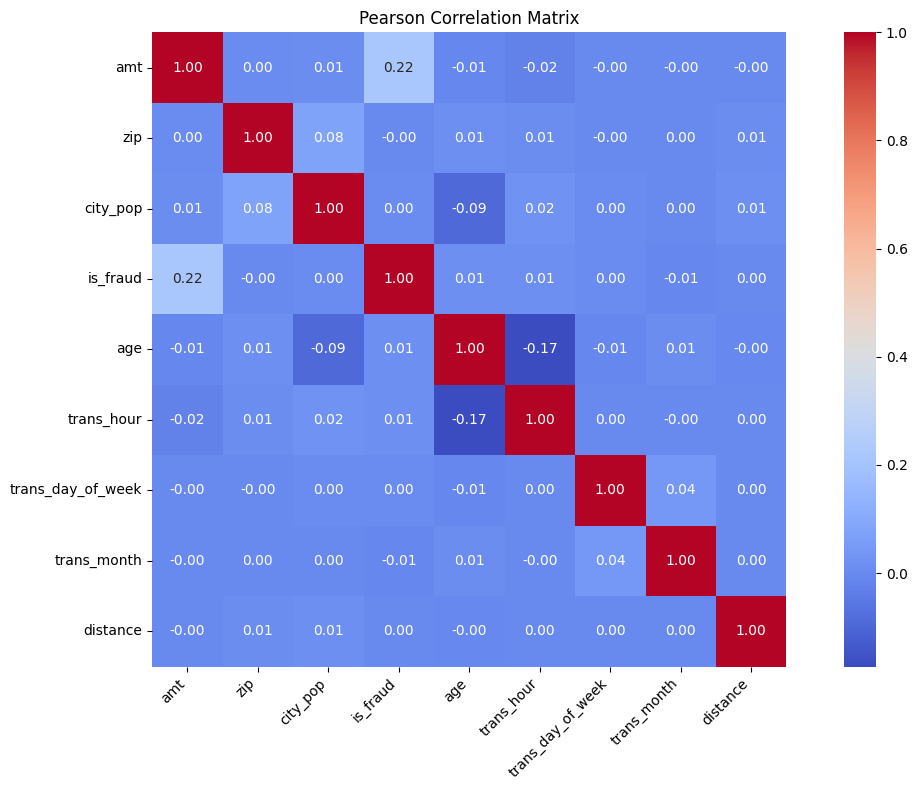

In [13]:
plot_correlation_matrix(df_train)

Upon investigating the training dataset, the Pearson correlation matrix reveals a slightly positive correlation between the target variable (`is_fraud`) and the transaction amount (`amt`).

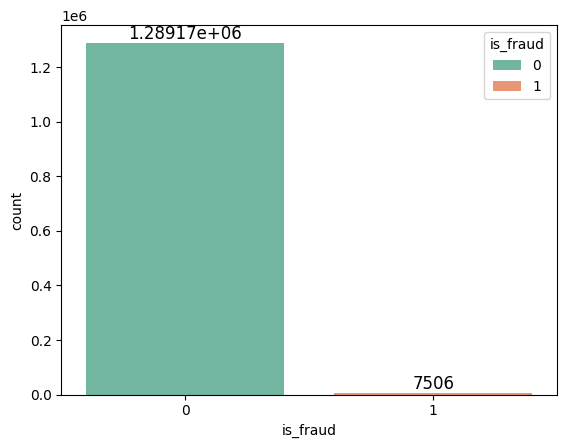

In [14]:
ax = sns.countplot(df_train, x="is_fraud", hue="is_fraud", palette="Set2")
for container in ax.containers:
    ax.bar_label(container, fontsize=12)
plt.show()

The severe imbalance of the target value may result in poor predictive performance, especially for minority class. To address this issue, we can either **oversample the minority class** or **undersamble the majority class** during training process. 

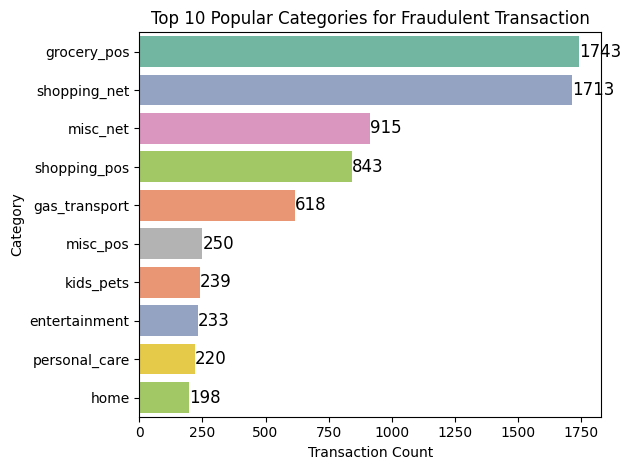

In [15]:
# Create a df only with fraudulent transactions
fraud_df = df_train[df_train["is_fraud"] == 1]

# Get the top 10 categories by frequency among fraudulent transactions
top_categories = fraud_df["category"].value_counts().index[:10]
ax = sns.countplot(
    data=fraud_df,
    y="category",
    order=top_categories,
    hue="category",
    palette="Set2",
)
for container in ax.containers:
    ax.bar_label(container, fontsize=12)

plt.title("Top 10 Popular Categories for Fraudulent Transaction")
plt.xlabel("Transaction Count")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

`grocery_pos` and `shopping_net` are by far the most prevalent categories for fraudulent transactions, suggesting that fraudsters may target everyday spending or online shopping platforms. Both online (e.g., `shopping_net`, `misc_net`) and physical point-of-sale (e.g., `grocery_pos`, `shopping_pos`) categories feature prominently, indicating that fraud is not limited to a single transaction channel.

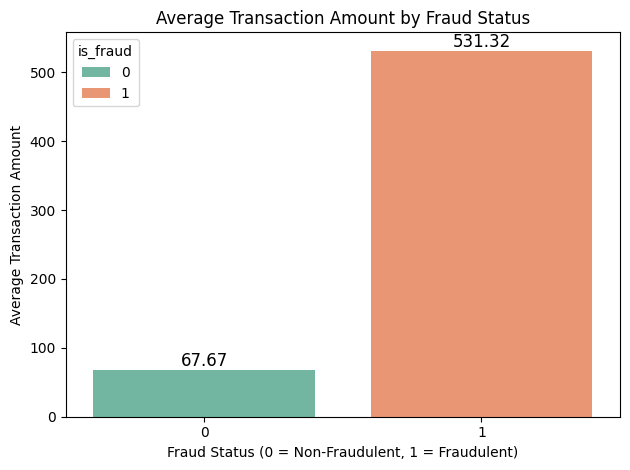

In [16]:
# Group by 'is_fraud' and calculate the mean transaction amount
average_amt_fraud = df_train.groupby("is_fraud")["amt"].mean().reset_index()

# Rename columns for clarity
average_amt_fraud.columns = ["is_fraud", "average_amt"]

# Plotting the average transaction amount by fraud status
ax = sns.barplot(
    data=average_amt_fraud,
    x="is_fraud",
    y="average_amt",
    hue="is_fraud",
    palette="Set2",
)

# Add value labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", fontsize=12)

plt.title("Average Transaction Amount by Fraud Status")
plt.xlabel("Fraud Status (0 = Non-Fraudulent, 1 = Fraudulent)")
plt.ylabel("Average Transaction Amount")
plt.tight_layout()
plt.show()


The average amount for fraudulent transactions is approximately eight times greater than that for non-fraudulent transactions. This substantial difference suggests that fraudsters are more likely to attempt larget transactions, possibly to maximise their gain from each fraudulent activity.

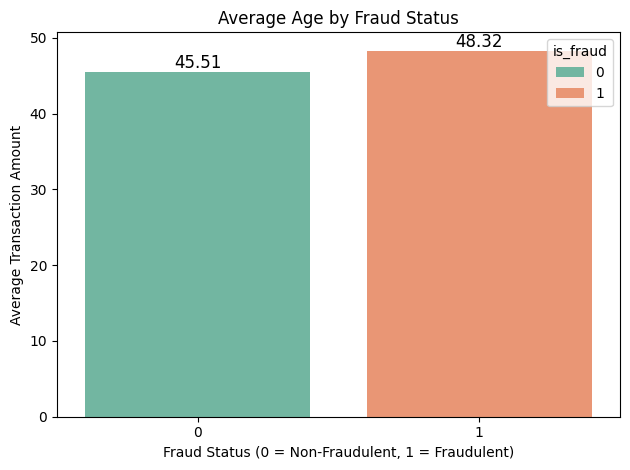

In [17]:
# Group by 'is_fraud' and calculate the mean age
average_amt_fraud = df_train.groupby("is_fraud")["age"].mean().reset_index()

# Rename columns for clarity
average_amt_fraud.columns = ["is_fraud", "average_age"]

# Plotting the average transaction amount by fraud status
ax = sns.barplot(
    data=average_amt_fraud,
    x="is_fraud",
    y="average_age",
    hue="is_fraud",
    palette="Set2",
)

# Add value labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", fontsize=12)

plt.title("Average Age by Fraud Status")
plt.xlabel("Fraud Status (0 = Non-Fraudulent, 1 = Fraudulent)")
plt.ylabel("Average Transaction Amount")
plt.tight_layout()
plt.show()

Although the difference in average age is not dramatic, it may indicate that slightly older individuals are either more likely to be targeted by, or involved in fraudulent activities.

In [18]:
# Encode categorical variables using LabelEncoder
from sklearn.preprocessing import LabelEncoder

X_train = df_train.drop(columns=["is_fraud"])
y_train = df_train["is_fraud"]

X_test = df_test.drop(columns=["is_fraud"])
y_test = df_test["is_fraud"]

categorical_cols = X_train.select_dtypes(include=["object"]).columns.tolist()

label_encoder = LabelEncoder()
for col in categorical_cols:
    # Fit LabelEncoder on the union of train and test data to avoid unseen labels
    combined = pd.concat([X_train[col], X_test[col]])
    label_encoder.fit(combined)

    # Transform both train and test data
    X_train[col] = label_encoder.transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

In [19]:
X_train.head()

,merchant,category,amt,gender,street,city,state,zip,city_pop,job,age,trans_hour,trans_day_of_week,trans_month,distance
0,514,8,4.97,0,576,532,27,28654,3495,372,30,0,1,1,78.597568
1,241,4,107.23,0,439,619,47,99160,149,431,40,0,1,1,30.212176
2,390,0,220.11,1,610,474,13,83252,4154,308,56,0,1,1,108.206083
3,360,2,45.00,1,945,84,26,59632,1939,330,52,0,1,1,95.673231
4,297,9,41.96,1,422,217,45,24433,99,116,32,0,1,1,77.556744


In [20]:
X_test.head()

,merchant,category,amt,gender,street,city,state,zip,city_pop,job,age,trans_hour,trans_day_of_week,trans_month,distance
0,319,10,2.86,1,364,168,40,29209,333497,288,52,12,6,6,24.561462
1,591,10,29.84,0,378,16,44,84002,302,406,30,12,6,6,104.925092
2,611,5,41.28,0,935,64,34,11710,34496,272,49,12,6,6,59.080078
3,222,9,60.05,1,339,814,9,32780,54767,422,32,12,6,6,27.698567
4,292,13,3.19,1,591,262,22,49632,1126,205,65,12,6,6,104.335106


## 5. Predictive Modelling
For this regression tasks, the following three regressors will be compared and evaluted:
- Random Forest Classifier
- LightGBM Classifier
- XGBoost Classifier

### Using Pipeline for Preprocessing
Pipelines ensure that all transformations are applied consistently and reproducibly, reduce the risk of data leakage and make the code cleaner. With `.ColumnTransformer()`, we can scale only the specified columns while leaving the other columns unchanged. This approach is ideal for this prediction task, as we need to apply standard scaler to some numerical features, excluding those transformed by `LabelEncoder()` to avoid misinterpreting categorical labels as continuous or ordinal labels.

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

columns_to_standardise = [
    "amt",
    "age",
    "distance",
    "trans_hour",
    "trans_day_of_week",
    "trans_month",
]

# Create a ColumnTransformer for scaling only the specified columns
preprocessor = ColumnTransformer(
    transformers=[("num", StandardScaler(), columns_to_standardise)],
    remainder="passthrough",  # Leave other columns unchanged
)

### Hyperparameter Tuning
Optimisation of hyperparameters is essential to obtain the best performance from machine learning models. **Grid Search** or **Random Search** is typically used to find the best hyperparameters with cross-validation.

We use the stratified K-Fold cross-validator `StratifiedKFold()`. With this approach, each fold maintains approximately the same percentage of samples for each class as found in the original dataset. This technique is especially suitable for classification problems with imbalanced classes, preventing bias caused by random splitting and ensuring fair evaluation of all classes.

Instead of manually repeating the hyperparameter tuning process for each model under evaluation, we can employ a `Pipeline` to automate the entire workflow. A pipeline establishes a structured sequence for data preprocessing, model building, and evaluation. This approach enables us to modularise the machine learning process, making it significantly more efficient and scalable.

In [22]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [23]:
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42, n_jobs=-1),
    "LightGBM": LGBMClassifier(random_state=42, verbose=-1, n_jobs=-1),
    "XGBoost": XGBClassifier(eval_metric="logloss", random_state=42, n_jobs=-1),
}


param_grids = {
    "Random Forest": {
        "clf__n_estimators": [25, 50],
    },
    "LightGBM": {
        "clf__n_estimators": [200, 300],
        "clf__learning_rate": [0.1, 0.2],
    },
    "XGBoost": {
        "clf__n_estimators": [200, 300],
        "clf__learning_rate": [0.1, 0.2],
    },
}


As mentioned in [4. Exploratory Data Analysis](#4-exploratory-data-analysis), the target variable shows class imbalance, which may result in misleading performance metrics. To address this, we employ the **Synthetic Minority Oversampling Technique** (SMOTE), which generates synthetic samples for the minority class by interpolating between existing minority instances. This approach reduces overfitting compared to simple duplication.

SMOTE is an oversampler from the imbalanced-learn library, and while it does implement the necessary methods, it is not compatible with `sklearn.pipeline.Pipeline`. Instead, `imblearn.pipeline.Pipeline` must be used to work with samplers in `imblearn`.

In [24]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from imblearn.over_sampling import SMOTE


def find_best_estimators(
    classifiers: Dict[str, Any],
    X_train: pd.DataFrame,
    y_train: pd.Series,
    n_splits: int = 5,
) -> Dict[str, Any]:
    """
    Perform hyperparameter tuning using GridSearchCV with SMOTE oversampling for multiple classifiers.

    Args:
        classifiers: A dictionary where keys are classifier names (str) and values are
            classifier instances (e.g., scikit-learn estimators).
        X_train: Training features.
        y_train: Training target labels.
        n_splits: Number of splits for StratifiedKFold cross-validation. Defaults to 3.

    Returns:
        A dictionary mapping classifier names to their best fitted pipeline (including preprocessing,
            SMOTE, and the classifier with optimal hyperparameters).

    """
    best_estimators = {}
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    for name, clf in classifiers.items():
        print(f"\n===== {name} =====")
        pipeline = Pipeline(
            [
                ("preprocessing", preprocessor),
                ("smote", SMOTE(random_state=42)),
                ("clf", clf),
            ]
        )
        param_grid = param_grids[name]
        grid = GridSearchCV(
            estimator=pipeline,
            param_grid=param_grid,
            scoring="f1",
            cv=skf,
            n_jobs=-1,
            verbose=0,
        )
        grid.fit(X_train, y_train)
        print(f"Best hyperparameters for {name}: {grid.best_params_}")
        print(f"Best mean cross-validated F1-score: {grid.best_score_:.4f}")
        best_estimators[name] = grid.best_estimator_
    return best_estimators

In [25]:
best_estimators = find_best_estimators(
    classifiers=classifiers, X_train=X_train, y_train=y_train
)


===== Random Forest =====
Best hyperparameters for Random Forest: {'clf__n_estimators': 50}
Best mean cross-validated F1-score: 0.8033

===== LightGBM =====


/Users/tsu76i/Documents/Programming/Personal Projects/DS_Projects/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/tsu76i/Documents/Programming/Personal Projects/DS_Projects/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/tsu76i/Documents/Programming/Personal Projects/DS_Projects/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/tsu76i/Documents/Programming/Personal Projects/DS_Projects/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.wa

Best hyperparameters for LightGBM: {'clf__learning_rate': 0.1, 'clf__n_estimators': 300}
Best mean cross-validated F1-score: 0.8812

===== XGBoost =====
Best hyperparameters for XGBoost: {'clf__learning_rate': 0.2, 'clf__n_estimators': 300}
Best mean cross-validated F1-score: 0.8954


### Evaluation on Test Data

In [26]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
)


def evaluate_classifier(
    model: Dict[str, Any], X_test: pd.DataFrame, y_test: pd.Series, model_name: str
) -> Dict[str, Any]:
    """
    Evaluate a trained classification model on a test dataset and visualise the confusion matrix.

    This function computes several standard classification metrics—including accuracy, precision,
    recall, F1-score, and ROC-AUC—based on the model's predictions. It also displays the confusion
    matrix as a heatmap and prints a detailed classification report.

    Args:
        model: The trained classification model supporting the .predict() method (e.g., scikit-learn estimator).
        X_test: Test feature data.
        y_test: True labels for the test data.
        model_name: Name of the model.

    Returns:
        A dictionary containing the following evaluation metrics (rounded to four decimal places):
            - 'Accuracy': Overall accuracy of the classifier.
            - 'Precision': Precision score, representing the ratio of true positives to all predicted positives.
            - 'Recall': Recall score, representing the ratio of true positives to all actual positives.
            - 'F1-Score': Harmonic mean of precision and recall.
            - 'ROC-AUC': Area under the Receiver Operating Characteristic curve.
    """
    y_pred = model.predict(X_test)
    acc = round(accuracy_score(y_test, y_pred), 4)
    pre = round(precision_score(y_test, y_pred), 4)
    rec = round(recall_score(y_test, y_pred), 4)
    f1 = round(f1_score(y_test, y_pred), 4)
    roc_auc = round(roc_auc_score(y_test, y_pred), 4)

    c_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(c_matrix, annot=True, fmt="d", cmap="Reds")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()
    print(
        f"Classification Report ({model_name}):\n {classification_report(y_test, y_pred)}"
    )
    return {
        "Accuracy": acc,
        "Precision": pre,
        "Recall": rec,
        "F1-Score": f1,
        "ROC-AUC": roc_auc,
    }

In [27]:
best_model_rf = best_estimators["Random Forest"]
best_model_lightgbm = best_estimators["LightGBM"]
best_model_xgb = best_estimators["XGBoost"]

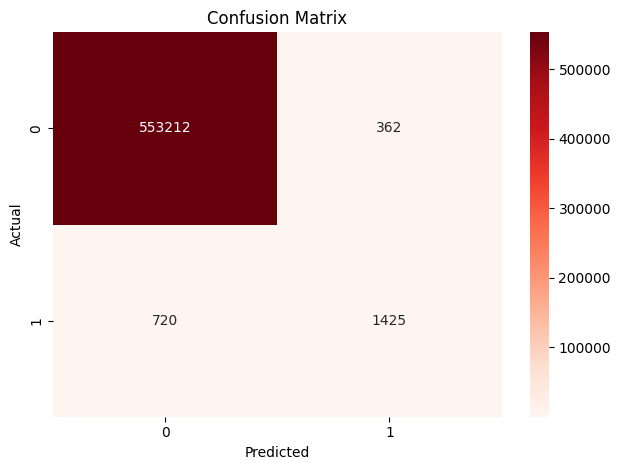

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.80      0.66      0.72      2145

    accuracy                           1.00    555719
   macro avg       0.90      0.83      0.86    555719
weighted avg       1.00      1.00      1.00    555719



/Users/tsu76i/Documents/Programming/Personal Projects/DS_Projects/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


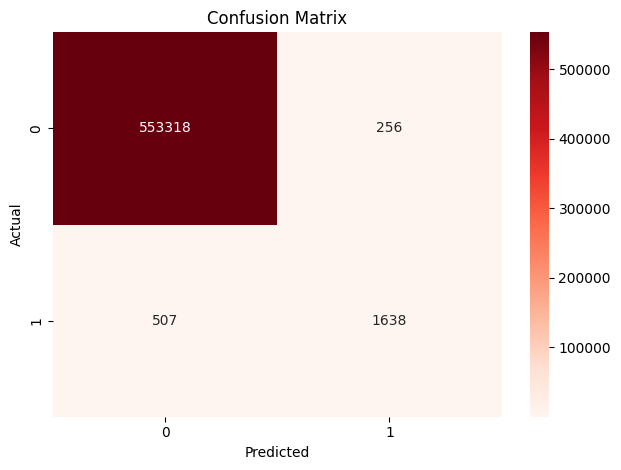

Classification Report (LightGBM):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.86      0.76      0.81      2145

    accuracy                           1.00    555719
   macro avg       0.93      0.88      0.91    555719
weighted avg       1.00      1.00      1.00    555719



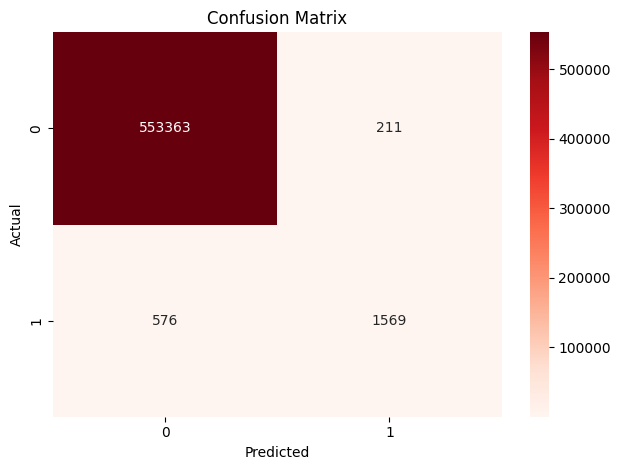

Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.88      0.73      0.80      2145

    accuracy                           1.00    555719
   macro avg       0.94      0.87      0.90    555719
weighted avg       1.00      1.00      1.00    555719



In [28]:
results_rf = evaluate_classifier(best_model_rf, X_test, y_test, "Random Forest")
results_lightgbm = evaluate_classifier(best_model_lightgbm, X_test, y_test, "LightGBM")
results_xgb = evaluate_classifier(best_model_xgb, X_test, y_test, "XGBoost")

In [29]:
results_df = pd.DataFrame(
    [
        results_rf,
        results_lightgbm,
        results_xgb,
    ],
    [
        "Random Forest",
        "LightGBM",
        "XGBoost",
    ],
)
print(results_df)

               Accuracy  Precision  Recall  F1-Score  ROC-AUC
Random Forest    0.9981     0.7974  0.6643    0.7248   0.8318
LightGBM         0.9986     0.8648  0.7636    0.8111   0.8816
XGBoost          0.9986     0.8815  0.7315    0.7995   0.8655


## 6. Conclusion

All models achieved extremely high overall accuracy. However, given the severe class imbalance of the target variable (fraudulent transactions are rare), accuracy alone is not a sufficient indicator of model effectiveness for fraud detection.

For precision (proportion of predicted frauds that are actually fraud), **XGBoost** had a slightly better performance than **LightGBM**. **LightGBM**  provided the highest recall (proportion of actual frauds detected), F1-score (harmonic mean of precision and recall) and ROC-AUC for the minority class. This suggests that **LightGBM** is considered the most preferred model at identifying fraudulent transactions while maintaining a relatively low false positive rate.

## 7. References

1. Ashutosh Yadav. (2023). *Distance Between Two Geo-Locations in Python*. <br>
https://www.askpython.com/python/examples/find-distance-between-two-geo-locations

1. Google for Developers. (2025). *Classification: Accuracy, recall, precision, and related metrics*. <br>
https://developers.google.com/machine-learning/crash-course/classification/accuracy-precision-recall

1. Le Borgne, Y.-A., Siblini, W., Lebichot, B., & Bontempi, G. (2022). *Reproducible Machine Learning for Credit Card Fraud Detection - Practical Handbook*. Université Libre de Bruxelles. <br>
https://fraud-detection-handbook.github.io/fraud-detection-handbook/Foreword.html